In [2]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv("cleaned_data.csv") 
df

,channelGrouping,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,...,networkDomain,hits,pageviews,campaign,source,medium,year,month,day,transactionRevenue
0,Organic Search,1,1472830385,Chrome,Windows,False,desktop,Asia,Western Asia,Turkey,...,ttnet.com.tr,1,1.0,(not set),google,organic,2016,9,2,NaN
1,Organic Search,1,1472880147,Firefox,Macintosh,False,desktop,Oceania,Australasia,Australia,...,dodo.net.au,1,1.0,(not set),google,organic,2016,9,2,NaN
2,Organic Search,1,1472865386,Chrome,Windows,False,desktop,Europe,Southern Europe,Spain,...,unknown.unknown,1,1.0,(not set),google,organic,2016,9,2,NaN
3,Organic Search,1,1472881213,UC Browser,Linux,False,desktop,Asia,Southeast Asia,Indonesia,...,unknown.unknown,1,1.0,(not set),google,organic,2016,9,2,NaN
4,Organic Search,2,1472822600,Chrome,Android,True,mobile,Europe,Northern Europe,United Kingdom,...,unknown.unknown,1,1.0,(not set),google,organic,2016,9,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903648,Social,1,1483554750,Chrome,Windows,False,desktop,Americas,Caribbean,Puerto Rico,...,prtc.net,17,15.0,(not set),youtube.com,referral,2017,1,4,NaN
903649,Social,1,1483543798,Chrome,Android,True,mobile,Asia,Southern Asia,Sri Lanka,...,unknown.unknown,18,13.0,(not set),youtube.com,referral,2017,1,4,NaN
903650,Social,1,1483526434,Android Webview,Android,True,mobile,Asia,Eastern Asia,South Korea,...,unknown.unknown,24,21.0,(not set),youtube.com,referral,2017,1,4,NaN
903651,Social,1,1483592864,Chrome,Windows,False,desktop,Asia,Southeast Asia,Indonesia,...,unknown.unknown,24,22.0,(not set),facebook.com,referral,2017,1,4,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   channelGrouping     903653 non-null  object 
 1   visitNumber         903653 non-null  int64  
 2   visitStartTime      903653 non-null  int64  
 3   browser             903653 non-null  object 
 4   operatingSystem     903653 non-null  object 
 5   isMobile            903653 non-null  bool   
 6   deviceCategory      903653 non-null  object 
 7   continent           903653 non-null  object 
 8   subContinent        903653 non-null  object 
 9   country             903653 non-null  object 
 10  region              903653 non-null  object 
 11  metro               903653 non-null  object 
 12  city                903653 non-null  object 
 13  networkDomain       903653 non-null  object 
 14  hits                903653 non-null  int64  
 15  pageviews           903553 non-nul

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



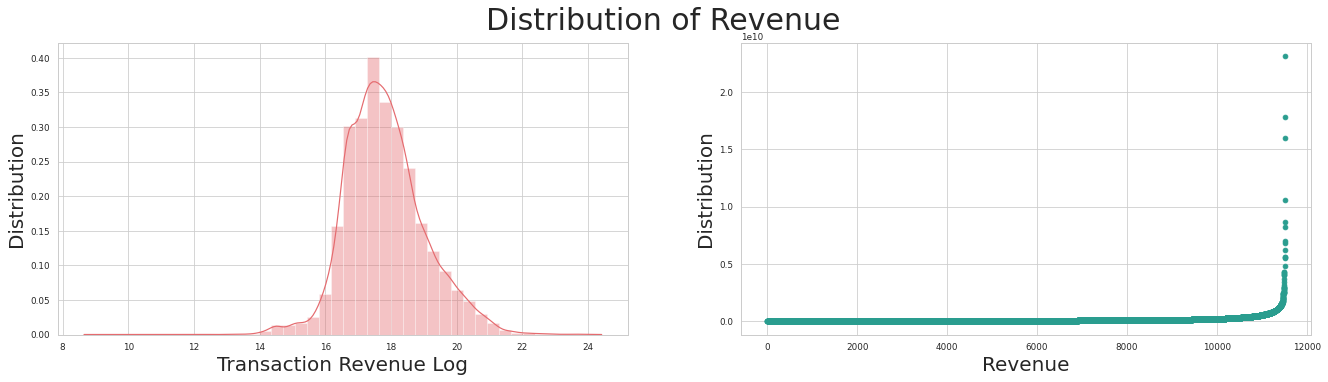

In [19]:
import matplotlib.pyplot as plt 
import seaborn as sns 

# Importing librarys to use on interactive graphs
import plotly.offline as plty
from plotly import tools
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot 
import plotly.graph_objs as go 

# to set a style to all graphs
plt.style.use('fivethirtyeight')
init_notebook_mode(connected=True)
sns.set_style("whitegrid")
sns.set_context("paper")

# Explore revenue
fig = plt.figure(figsize=(20,5))
plt.suptitle('Distribution of Revenue', fontsize=30)

ax1 = fig.add_subplot(121)
_ = sns.distplot(np.log(df[df['transactionRevenue'] > 0]["transactionRevenue"]), bins=40,color='#e56b6f', ax=ax1)
_ = ax1.set_ylabel('Distribution', fontsize=20)
_ = ax1.set_xlabel('Transaction Revenue Log', fontsize=20)


ax2 = fig.add_subplot(122)
_ = plt.scatter(range(df.shape[0]), np.sort(df['transactionRevenue'].values), color='#2a9d8f')
_ = ax2.set_ylabel('Distribution', fontsize=20)
_ = ax2.set_xlabel('Revenue', fontsize=20)


In [6]:
def make_bar_chart(cnt_srs, color):
    trace = go.Bar(
        y=cnt_srs.index[::-1],
        x=cnt_srs.values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

/opt/conda/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



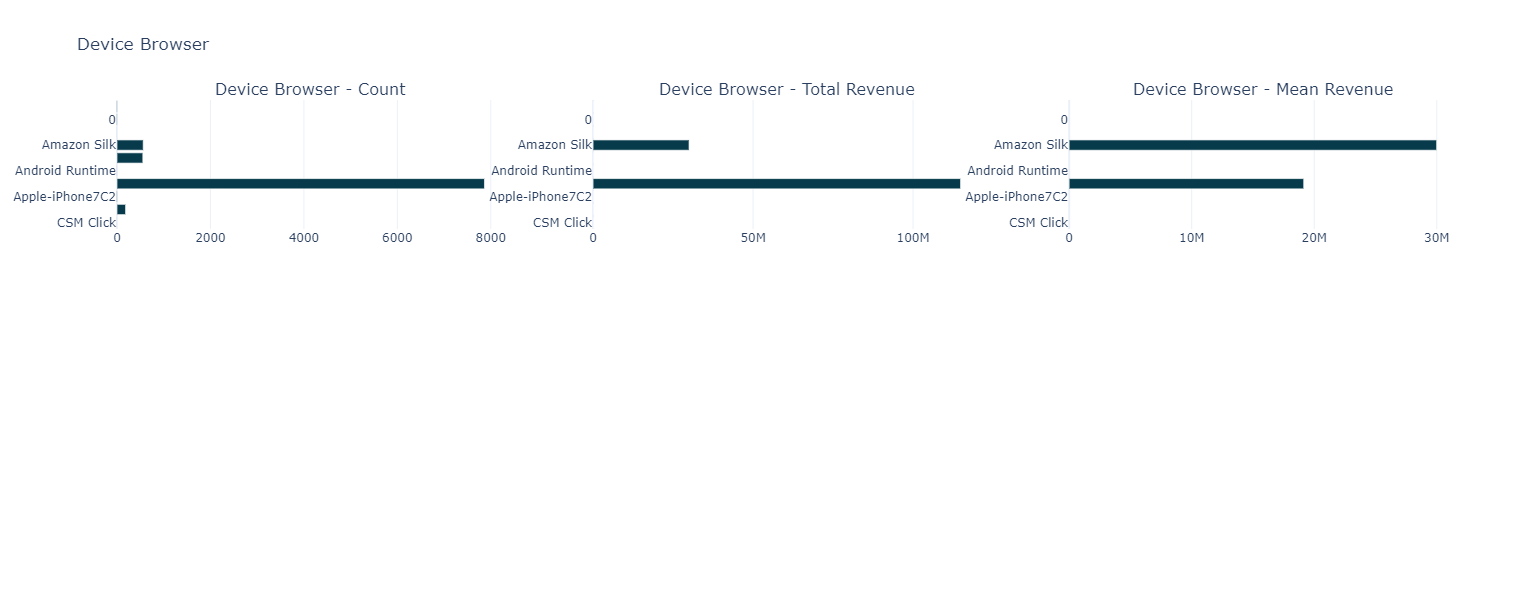

In [18]:
# Device Browser statistics 

aggs = df.groupby('browser')['transactionRevenue'].agg(['size', 'sum', 'mean'])

aggs.columns = ["count", "total_revenue", "mean"]
cnt_srs = aggs.sort_values(by="count", ascending=False)
trace1 = make_bar_chart(aggs["count"].head(10), '#073b4c')
trace2 = make_bar_chart(aggs["total_revenue"].head(10), '#073b4c')
trace3 = make_bar_chart(aggs["mean"].head(10), '#073b4c')

fig = tools.make_subplots(rows=3, cols=3, vertical_spacing=0.04, 
                          subplot_titles=["Device Browser - Count", "Device Browser - Total Revenue", "Device Browser - Mean Revenue"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)

fig['layout'].update(height=600, width=1500, template='plotly_white',paper_bgcolor='#ffffff', title="Device Browser")
plty.iplot(fig, filename='device-plots')

/opt/conda/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



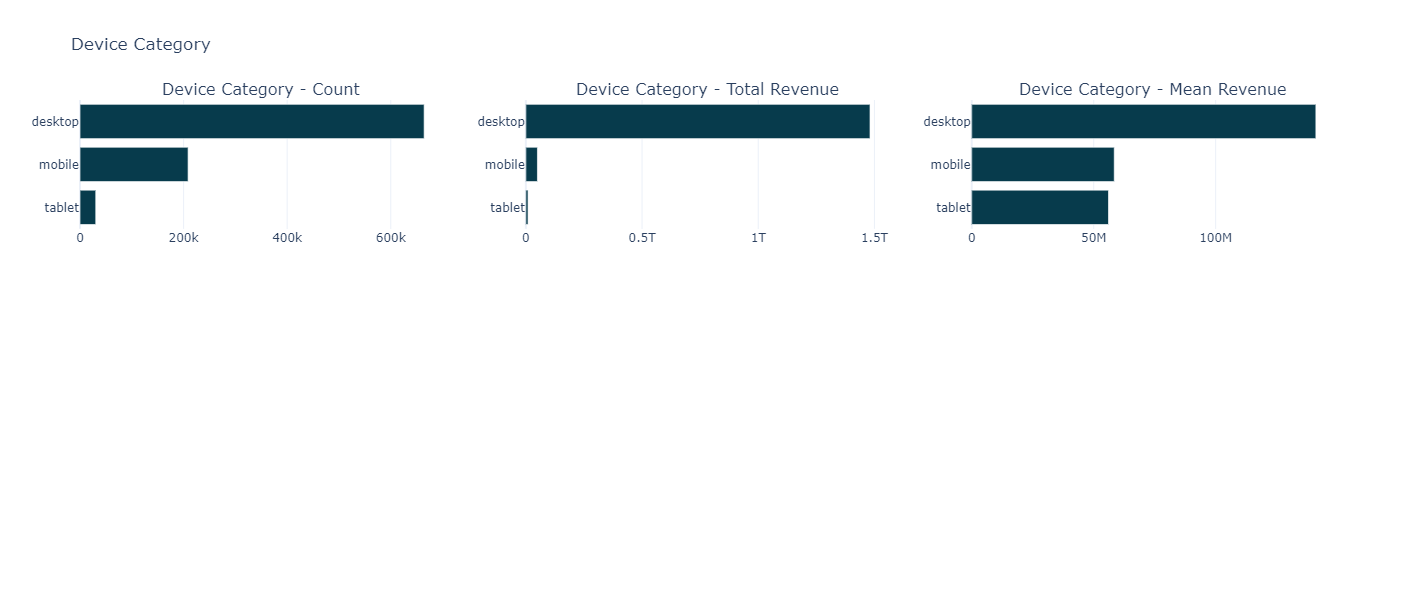

In [8]:
# Device Category statistics 

aggs = df.groupby('deviceCategory')['transactionRevenue'].agg(['size', 'sum', 'mean'])

aggs.columns = ["count", "total_revenue", "mean"]
cnt_srs = aggs.sort_values(by="count", ascending=False)
trace1 = make_bar_chart(aggs["count"].head(10), '#073b4c')
trace2 = make_bar_chart(aggs["total_revenue"].head(10), '#073b4c')
trace3 = make_bar_chart(aggs["mean"].head(10), '#073b4c')

fig = tools.make_subplots(rows=3, cols=3, vertical_spacing=0.04, 
                          subplot_titles=["Device Category - Count", "Device Category - Total Revenue", "Device Category - Mean Revenue"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)

fig['layout'].update(height=600, width=1500, template='plotly_white',paper_bgcolor='#ffffff', title="Device Category")
plty.iplot(fig, filename='device-plots')

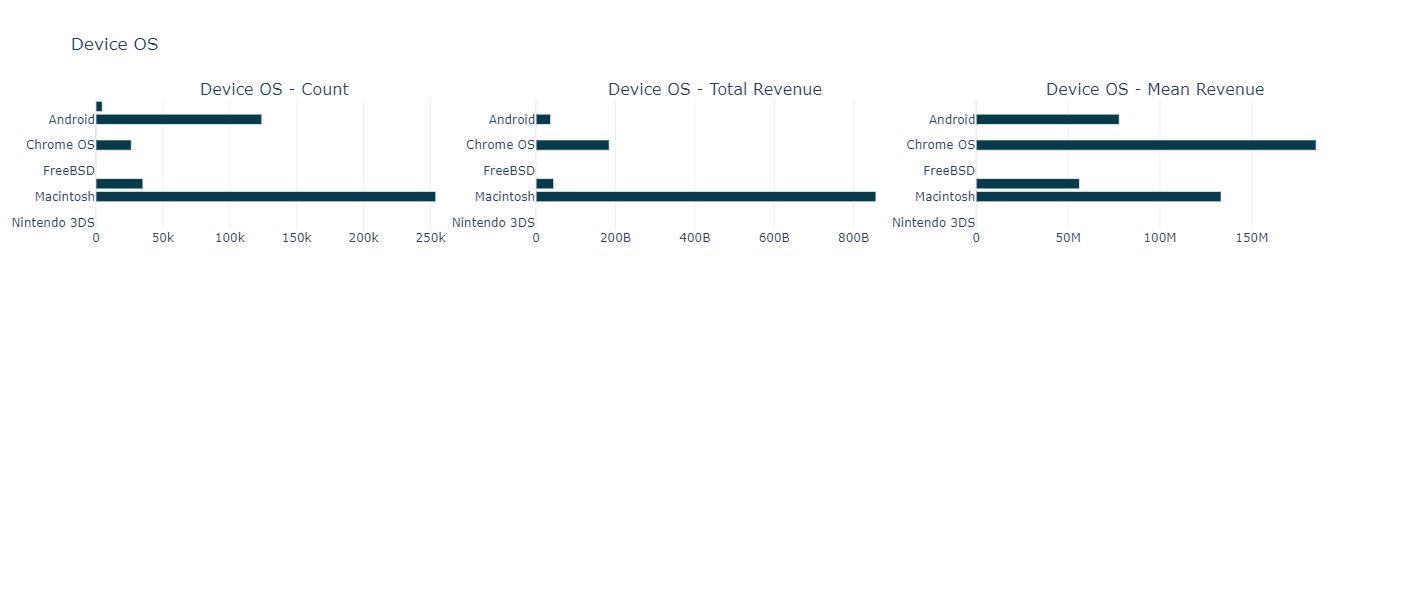

In [9]:
# Device Category statistics 

aggs = df.groupby('operatingSystem')['transactionRevenue'].agg(['size', 'sum', 'mean'])

aggs.columns = ["count", "total_revenue", "mean"]
cnt_srs = aggs.sort_values(by="count", ascending=False)
trace1 = make_bar_chart(aggs["count"].head(10), '#073b4c')
trace2 = make_bar_chart(aggs["total_revenue"].head(10), '#073b4c')
trace3 = make_bar_chart(aggs["mean"].head(10), '#073b4c')

fig = tools.make_subplots(rows=3, cols=3, vertical_spacing=0.04, 
                          subplot_titles=["Device OS - Count", "Device OS - Total Revenue", "Device OS - Mean Revenue"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)

fig['layout'].update(height=600, width=1500, template='plotly_white',paper_bgcolor='#ffffff', title="Device OS")
plty.iplot(fig, filename='device-plots')

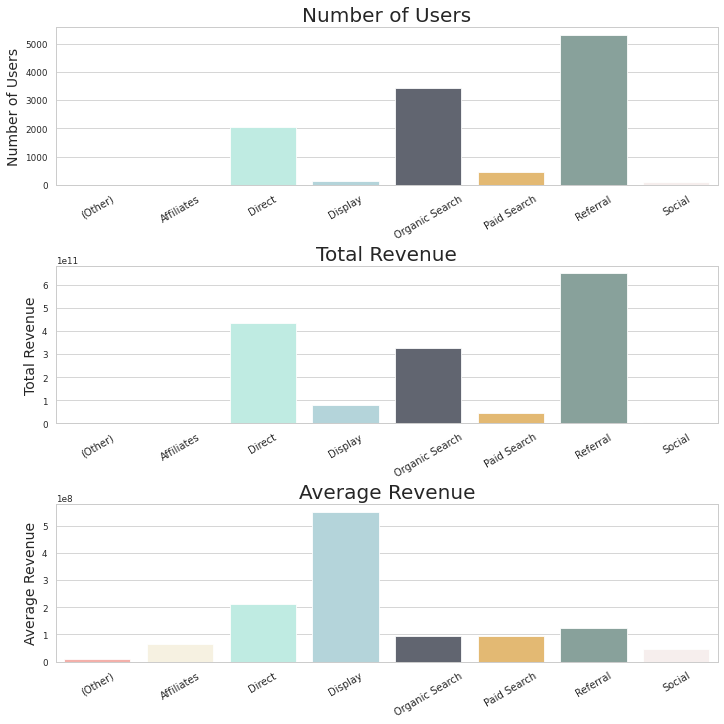

In [10]:
aggs = df.groupby('channelGrouping')['transactionRevenue'].agg(['count','sum','mean']).reset_index()

color = ["#ffa69e","#faf3dd","#b8f2e6","#aed9e0","#5e6472",'#f6bd60','#84a59d','#f8edeb']
customPalette = sns.set_palette(sns.color_palette(color))

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(311)
_ = sns.barplot(data=aggs, x='channelGrouping', y='count', palette= customPalette, ax=ax1)
xlabels = aggs['channelGrouping'].to_list()
ylabels = aggs['count']
_ = ax1.set_title('Number of Users', fontsize=20)
_ = ax1.set_ylabel('Number of Users', fontsize=14)
_ = ax1.set_xlabel('')
_ = ax1.set_xticklabels(xlabels, rotation=30, fontsize=10)

ax2 = fig.add_subplot(312)
_ = sns.barplot(data=aggs, x='channelGrouping', y='sum', palette= customPalette, ax=ax2)
xlabels = aggs['channelGrouping'].to_list()
ylabels = aggs['sum']
_ = ax2.set_title('Total Revenue', fontsize=20)
_ = ax2.set_ylabel('Total Revenue', fontsize=14)
_ = ax2.set_xlabel('')
_ = ax2.set_xticklabels(xlabels, rotation=30, fontsize=10)

ax3 = fig.add_subplot(313)
_ = sns.barplot(data=aggs, x='channelGrouping', y='mean', palette= customPalette, ax=ax3)
xlabels = aggs['channelGrouping'].to_list()
ylabels = aggs['mean']
_ = ax3.set_title('Average Revenue', fontsize=20)
_ = ax3.set_ylabel('Average Revenue', fontsize=14)
_ = ax3.set_xlabel('')
_ = ax3.set_xticklabels(xlabels, rotation=30, fontsize=10)

fig.tight_layout(pad=0.5)

In [11]:
# Revenue by days of month

pd.crosstab(df['day'],
            df['month'], 
            values=(df['transactionRevenue'] / 1000000), 
            aggfunc='sum').style.background_gradient(cmap='viridis')

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
1,927.010000,5272.760000,4236.330000,382.060000,7126.080000,2891.730000,84.540000,14421.000000,5852.330000,770.720000,5635.720000,5116.250000
2,946.600000,3015.800000,3071.540000,918.040000,5048.240000,4512.870000,634.990000,1361.190000,4322.440000,3859.400000,5092.710000,5121.380000
3,3264.780000,4583.980000,2805.090000,4542.420000,5394.060000,1578.530000,1225.810000,0.000000,912.030000,5553.500000,4327.540000,986.840000
4,3606.170000,961.330000,1453.770000,4020.930000,3056.670000,1193.600000,379.980000,1182.890000,738.470000,2921.480000,4109.380000,1629.980000
5,8859.970000,762.640000,1907.050000,27150.610000,7099.860000,4093.650000,8029.360000,5594.260000,1565.800000,4829.020000,1153.610000,9109.000000
6,4191.240000,3509.290000,3433.990000,5863.490000,823.360000,2443.830000,3883.850000,1891.040000,4418.670000,3019.450000,1452.380000,12645.280000
7,357.270000,3883.870000,6277.620000,13701.410000,1270.520000,3066.320000,4339.020000,2410.730000,5407.630000,3851.680000,2533.770000,9016.360000
8,1538.300000,2734.380000,3658.750000,1348.950000,5167.570000,2502.840000,454.960000,5273.810000,6468.400000,803.480000,6380.020000,7753.380000
9,6825.520000,5593.150000,3994.590000,1488.760000,7329.010000,3910.070000,751.100000,5596.400000,4443.980000,1854.150000,2833.600000,8364.450000


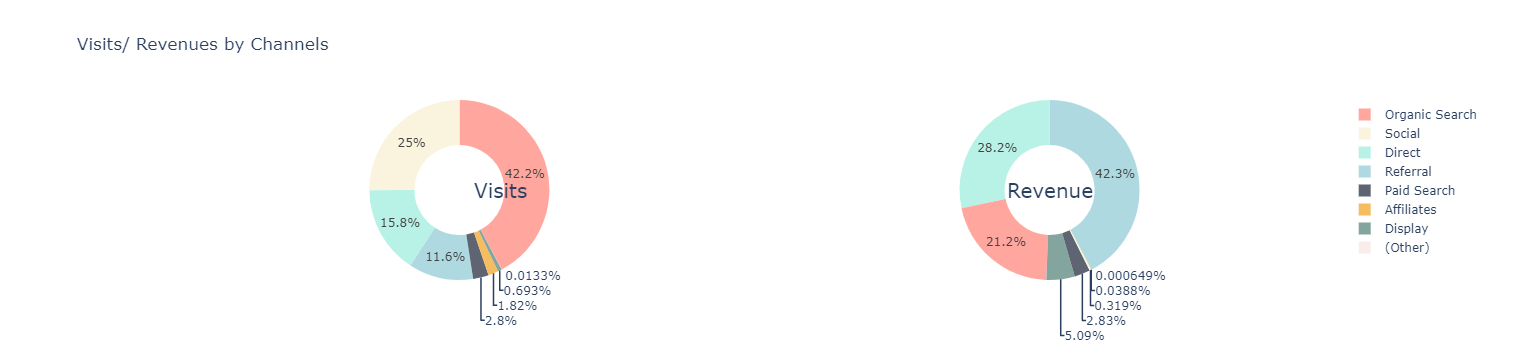

In [26]:
count_trace = df["channelGrouping"].value_counts()[:15].to_frame().reset_index()
rev_trace = df.groupby("channelGrouping")["transactionRevenue"].sum().nlargest(10).to_frame().reset_index()

trace1 = go.Pie(labels=count_trace['index'], values=count_trace["channelGrouping"], name= "% Acesses", hole= .5, 
                    hoverinfo="label+percent+name", showlegend=True,domain= {'x': [0, .48]}, 
                    marker=dict(colors=color))

trace2 = go.Pie(labels=rev_trace["channelGrouping"], 
                    values=rev_trace['transactionRevenue'], name="% Revenue", hole= .5, 
                    hoverinfo="label+percent+name", showlegend=False, domain= {'x': [.52, 1]})

layout = dict(title= "Visits/ Revenues by Channels", height=300, font=dict(size=12),
                  annotations = [
                      dict(
                          x=.25, y=.5,
                          text='Visits', 
                          showarrow=False,
                          font=dict(size=20)
                      ),
                      dict(
                          x=.80, y=.5,
                          text='Revenue', 
                          showarrow=False,
                          font=dict(size=20)
                      )
        ])

fig = dict(data=[trace1, trace2], layout=layout)
iplot(fig)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



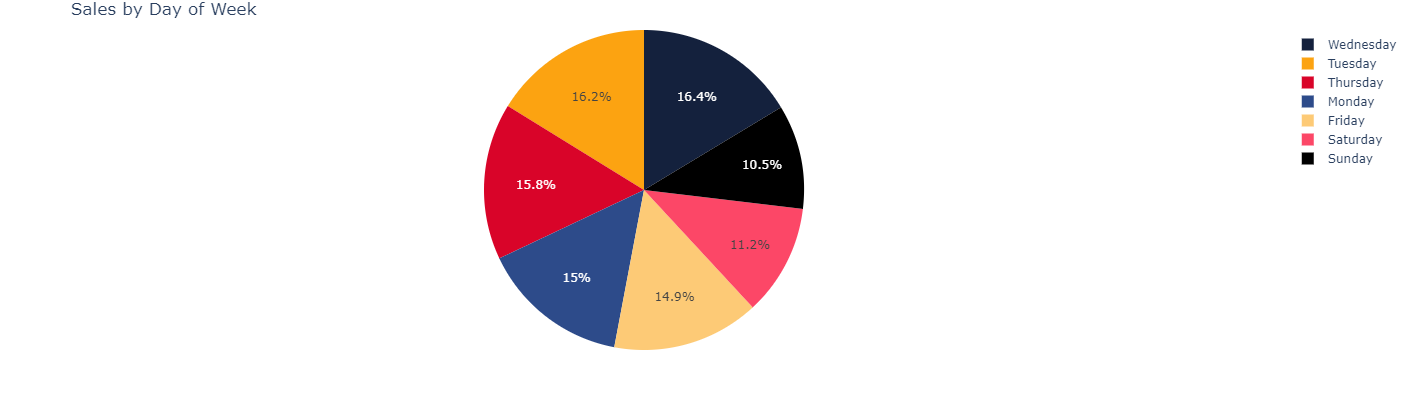

In [13]:
from datetime import datetime

def ep_to_day(ep):
    return datetime.fromtimestamp(ep).strftime("%A")

df_day = df[['visitStartTime', 'transactionRevenue']]
df_day['dayOfWeek'] = df['visitStartTime'].apply(lambda x: ep_to_day(x)) 
agg = df_day.groupby('dayOfWeek').size().rename('Count').reset_index()
fig = px.pie(agg, 
             values='Count', names='dayOfWeek', 
             color_discrete_sequence=['#14213d','#fca311','#d90429'],
            title='Sales by Day of Week',
            width=800,
            height=500)

fig.update_layout(
    margin=dict(l=25, r=20, t=30, b=50),
    width = 600,
    height = 400,
    paper_bgcolor="#ffffff",
)
fig.show()

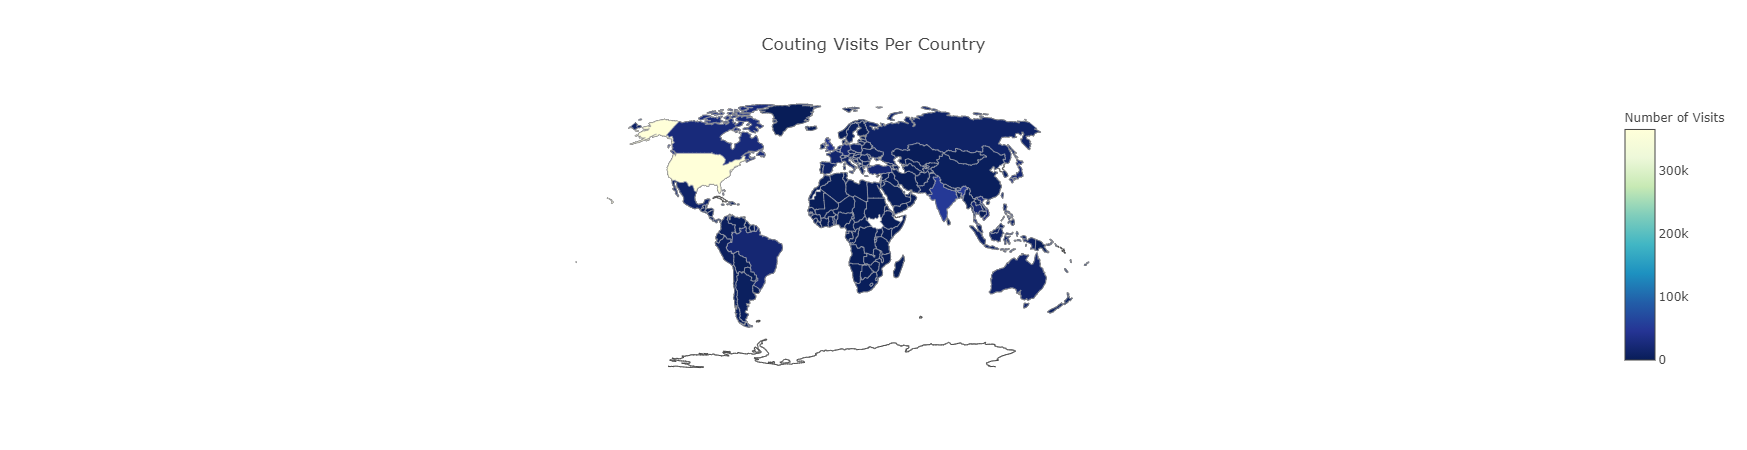

In [27]:
countMaps = pd.DataFrame(df['country'].value_counts()).reset_index()
countMaps.columns=['country', 'counts'] #renaming columns
countMaps = countMaps.reset_index().drop('index', axis=1) #reseting index and droping the column

data = [ dict(
        type = 'choropleth',
        locations = countMaps['country'],
        locationmode = 'country names',
        z = countMaps['counts'],
        text = countMaps['country'],
        colorscale = 'YlGnBu',
        autocolorscale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Number of Visits'),
      ) ]

layout = dict(
    title = 'Visits Per Country',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

figure = dict( data=data, layout=layout )
iplot(figure, validate=False, filename='map-countrys-count')